In [3]:
import pandas as pd
import cx_Oracle

dsn=cx_Oracle.makedsn('localhost',1521,'xe')
conn=cx_Oracle.connect('hotel','dbdb',dsn)
cursor=conn.cursor()
sql="""select extract(month from res_in) as month, sum(res_kid) as kid
from reserve
group by extract(month from res_in)
order by month
"""
cursor.execute(sql)

row=cursor.fetchall()
colname=cursor.description

cursor.close()
conn.close()

col=[]
for i in colname:
    col.append(i[0])

df= pd.DataFrame(row, columns=col)

(df)


,MONTH,KID
0,1,4
1,2,12
2,3,10
3,4,6
4,5,12
5,6,7
6,7,8
7,8,8
8,9,1
9,10,4


In [4]:
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import platform

In [6]:
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
    
elif platform.system() == 'Darwin':
    rc('font',family ='AppleGothic')

else:
    print('Check your OS system')

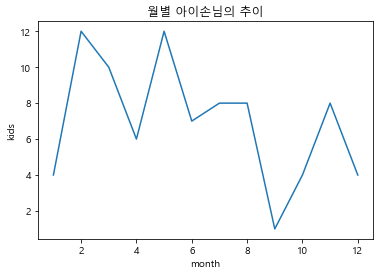

In [16]:
plt.plot(df['MONTH'], df['KID'])
plt.title('월별 아이손님의 추이')
plt.xlabel('month')
plt.ylabel('kids')
plt.savefig('plot.png')
plt.show()


<Figure size 432x288 with 0 Axes>